## Before going into the ML algorithm, the very start is to clean and upload the data
    import pandas as pd
    import numpy as np 

    import seaborn as sb 
    import matplotlib.pylab as plt

    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler

__upload the data__

    data = pd.read_csv('filename', sep='\ ')
    
__getting Y column__

    Y = mean_data['Y column']
    
__dropping the Y column from the X trainning set__

    X = full_data.drop('Y column', axis = 1)
        
__data shape__

    data.shape
        
__view data__

    data.head()
    
__data information__

    data.info()
    
__describe a column from the data__          # use the describe() function to show the count, mean, min, max for numeric attributes

    data["column"].describe()
    
__to describe information about categorical (object) attributes__

    data["column"].value_counts()
    
__deteced the outliers__

    sb.boxplot(x=data['column name'])
    
    sb.distplot(data,bins=10)
    
__to find correlations between columns__

    1- split the data to get numerical data only
    num_data = data.select_dtypes(include = ['float64', 'int64'])
    
    2- get names/title for each column
    num_data.columns
    
    3- make a loop to use the length of the column names and plot the Y column vs each X columns to see if a correlation is present
    for i in range(0, len(num_data.columns), 5):
        sns.pairplot(data = num_data, x_vars = num_data.columns[i:i+5],y_vars=['Y column'])
    OR
    
    4-use the corr function to correlate a column with the rest of the dataset
    num_data_corr = num_data.corr()['Y column']
    
    5- show the corr above 0.5 as below that there isnt a correlation
    top_corr = num_data_corr[abs(num_data_corr) > 0.5].sort_values(ascending=False)    #displays  correlation coefficient greater than 0.5
    
__Deleting the Outliers presented in the scatter plot of the correlation, in regards of the Y column__

    index_remove = data[(data['column name'] > 4000) & (data['Y column'] < 300000)].index   
    #finds the index that are true for the condition porvided, the condition is from visually identifying the outliers from the scatter plot
    
    outliers_dropped = data.drop(index_remove)   # drops the rows of indexes given from the above condition 

#### after finding the corr we can remove useless columns that dont help in the prediction of the Y column

__check if corr_data is normally distrbuted__

    sb.distplot(data['column'])                    # visual check
    
    or
    
    print("Skewness:", data['column'].skew())  # The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 
                                               # and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution 
                                               # is < -1.0 and > 1.0.
#### if a column is highly skewed, a tronsformation should be applied on the column only. 

__np log transformation__

    log_transformed_data = np.log(data['column']) 

#### to normalize the data frame. 
    
__MinMaxScaler__

    data_minmax                   =  data.copy()
    num_data                      =  data.select_dtypes(include = ['float64', 'int64'])                    # in case of transforming the
    data_minmax[num_data.columns] =  MinMaxScaler().fit_transform(data_minmax[num_data.columns])           # whole dataframe
    
    data_minmax['column name'] = MinMaxScaler().fit_transform(data_minmax[['column name']])     #fit_transform deals with both 2d array or DF
    
__StandardScaler__

    data_stand                    =  data.copy()               
    num_data                      =  data.select_dtypes(include = ['float64', 'int64'])                    # in case of transforming the
    data_stand[hous_num.columns]  =  StandardScaler().fit_transform(data_stand[num_data.columns])          # whole dataframe    
    
    data_stand['column name'] = StandardScaler().fit_transform(data_stand[['column name']])     #fit_transform deals with both 2d array or DF

__check for any duplication__

    duplicate = data.duplicated(['Unique Id column'])             # 1- create True / Flase dataset
    
    duplicate_index = duplicate[duplicate==True].index            # 2- get the index for the True 
    
    data.loc[duplicat_index,:]                                    # 3- use loc to view the duplicate row
    
    dup_removed = data.drop(duplicate_index,axis=0)               # 4- remove the duplicate row from the dataset
    
    dup_removed["Unique Id column"].is_unique                     # 5- to check if the new dataset is unique, the answer should be True
    
__deteced the NA values__

    null_data  = data.isnull()                                                 # data frame of T & F
    total_null = null_data.sum().sort_values(ascending=False)[0:20]            # the first 20 names of the sum of null in each column

__display the nulls in a bar chart as Count__

    total_null.plot(kind="bar", figsize = (8,6), fontsize = 10)

    plt.xlabel("Columns", fontsize = 20)
    plt.ylabel("Count", fontsize = 20)
    plt.title("Total Missing Values", fontsize = 20)
    
__to find the % of nulls in the columns__

    total_null = (null_data.head(20)/data.shape[0])*100                        # the null dataframe divided by the number of rows * 100
    
__display the nulls in a bar chart as relative frequency %"__

    total_null.plot(kind="bar", figsize = (8,6), fontsize = 10)

    plt.xlabel("Columns", fontsize = 20)
    plt.ylabel("relative frequency %", fontsize = 20)
    plt.title("Total Missing Values", fontsize = 20)
    
__drop the missing values, using dropna()__

    data.dropna(subset=["column name"])                                         # drops the NA rows for the whole dataframe
    
__drop the whole attribute (column), that contains missing values__

    data.drop("column name", axis=1)                                            # axis = 1 is for column and 0 is for the rows

__replace the missing values to (zero, the mean, the median, etc.)__

    mean   = data["column name"].mean()            --->           data["column name"].fillna(mean, inplace = True)
    
    median = data["column name"].median()          --->           data["column name"].fillna(median, inplace = True)     

__in case there are several features recorded that are non-numeric, use one-hot encoding__

    features_final_data = pd.get_dummies(data_normalized_transformed)


## The word Regression could be changed with Classifier and vis versa depending on the need
__Logistic Regression__

    from sklearn.linear_model import LogisticRegression

    classifier = LogisticRegression()

__Neural Networks__

    from sklearn.neural_network import MLPClassifier
    
    classifier = MLPClassifier()

__Decision Trees__

    from sklearn.tree import DecisionTreeClassifier

    classifier = DecisionTreeClassifier()
    
#####    min samples per split decrease may increase overfitting
#####    min samples per split increase may increase undefitting
#####    min samples per leaf decrease may increase overfitting
#####    min samples per leaf increase may increase undefitting
#####    max depth increase may increase overfitting
#####    max depth decrease may increase underfitting
    
    hyper_parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10], 'random_state' :[42]}
    
__AdaBoostClassifier__                                                            # Based on Ensemble Method Boost of __Decision Trees__

    from sklearn.ensemble import AdaBoostClassifier
    
    model = AdaBoostClassifier()
    
    hyper_parameters = {'learning_rate' :[0.01], 'n_estimators' :[1000], 'base_estimator' :[DecisionTreeClassifier(Decision Trees_hyper_parameters)],'random_state' :[42]}
    
__RandomForestClassifier__                                                        # Based on Ensemble Method Bagging of __Decision Trees__  

    from sklearn.ensemble import RandomForestClassifier
    
    rfc = RandomForestClassifier(bootstrap=True??)
    
    hyper_parameters = {'max_depth' :[4,7,10],'min_samples_leaf' :[50,100],'min_samples_split' :[100,200],'n_estimators' :[50,100,200], 'max_features': [5, 10,24]}

__Support Vector Machines__  --->  SVC

    from sklearn.svm import SVC

    classifier = SVC()
    
    hyper_parameters = {'C':[0.1,0.001,0.5,1,2,10], 'kernel':['poly'], 'degree':[1,2,3,4,5,6,7]}                    # Slow, more accurate
    
    hyper_parameters = {'C':[10,12,15,17,18,20], 'kernel':['rbf'], 'gamma':[0.01,0.1,10,0.001,0.0001,0.00001]}      # fast, default

__GradientBoostingClassifier__

    from sklearn.ensemble import GradientBoostingClassifier
    
__GridSearchCV__

    from sklearn.model_selection import GridSearchCV

    hyper_parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10], 'random_state' :[42]}
    
    cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
    
    grid_search = GridSearchCV (estimator = ?, param_grid = hyper_parameters, cv= "splitting func", scoring=" accuracy or f1 or r2 ", n_jobs = -1,verbose = 1)
        
    rf.fit(X_train, y_train)

__Getting accuracy__

    from sklearn.metrics import accuracy_score
    
__Getting f1_score__
    
    from sklearn.metrics import make_scorer                      

    from sklearn.metrics import f1_score

    scorer = make_scorer(f1_score)
    
__Create a confusion matrix__

    from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
    
    print(classification_report(y_test,predictions))
    
    print(confusion_matrix(y_test,predictions))

__Import the sklearn.feature_extraction.text.CountVectorizer method__         # to extract words as lowercase and their number of repetations

    from sklearn.feature_extraction.text import CountVectorizer
    
    count_vector = CountVectorizer()
    
    count_vector.fit(Text???)
    
    feat=count_vector.get_feature_names()
    
    for more info open (jupeter notebooks/ML/ML3/20 Naive/project/home/Bayesian_Inference_solution.ipynb)

    
### Split data into train and test data, y test are the true values that will be used VS y_prediction

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Create the  model and assign it to the variable model, example---> replace model???? with the modle of choice.

    classifier = model????()

### Fit the model to the training data.

    classifier.fit(X_train,y_train)

### Make predictions on the test data by the model you have trained, this is the "prediction" of the y column from the X columns

    y_prediction = classifier.predict(X_test)

### Calculate the accuracy and assign it to a variable on the test data, the accuracy is how much of the prediction is true, so the true column of y (y_test) is used with the predicted y (y_prediction)

    accuracy = accuracy_score(y_test, y_prediction)

### Same as the prediction but for the training set

    y_prediction_training = classifier.predict(X_train)

    accuracy = accuracy_score(y_train, y_prediction_training)

### Accuracy is not an accutrate measure since there are false +ve and false -ve, so it is the best to use precision, this is the case of Classification, this is called F1 score

    from sklearn.metrics import make_scorer                      

    from sklearn.metrics import f1_score                or               from sklearn.metrics import fbeta_score # to control the pr & rec

    scorer = make_scorer(f1_score, beta = 0.5)         # remove beta if normal f1 score
    
    print("F-score testing data: {:.4f}".format(fbeta_score(y_test, y_prediction, beta = 0.5)))           # beta < 1 add value to pre
                                                                                                          # beta > 1 add value to recall
  
    from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
    
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))

### Precison: is how many point predicted to be positive are really positive ![image.png](attachment:801b05b6-485f-4f64-8983-8316f835ffba.png)

### Recall:   is how many out of the labelled positive are predicted correct ![image.png](attachment:3df8483c-353a-4fb2-8dcb-be538f517761.png)

### In case of Regression the best line cant be predicted if the lines are parrallel, meaning the lines have same slope but different Y-intercept, so it is best to use Mean Squared Error, this is called R2 score

### The R2 works like the following: 1- drawing horizontal line to all the points as a simple model   -2- there is a big chance that the mean squared error for the simple model will be larger than the model that we have made   -3- divide the linear reg error to the simple model error

### A good model should have mean squared error of the linear regression a lot smaller than the mean squared error of the simple | incorrect modelthe R2 should be close to 1

    from sklearn.metrics import mean_absolute_error

    from sklearn.metrics import mean_squared_error

    from sklearn.metrics import r2_score

    mean_absolute_error = mean_absolute_error(y_true,y_prediction)

    mean_squared_error = mean_squared_error(y_true,y_prediction)

    R2 = r2_score(y_true,y_prediction)

### K-Fold Cross Validation sklearn is used when the need to further divide the training set into smaller tests before the final test

    from sklearn.model_selection import KFold

    X = dataset

    kf = KFold(3,shuffle=True)                       # this means to spilt the dataset into 3 equal parts to be used in testing and training  

    for train, test in kf.split(X):                  # to split the Kfold into train and test

        print(train,test)

### Learning curves are used to understand the Cross Validation to see if there is any over/under fitting

    from sklearn.model_selection import learning_curve

### This definition draws the matplot to display the Learning curves

    def draw_learning_curves(X, y, estimator, num_trainings):

        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

        print("train score:\n",train_scores)

        print()

        print("train size :\n",train_sizes)

        print()

        train_scores_mean = np.mean(train_scores, axis=1)

        print("train score mean:\n",train_scores_mean)

        print()

        print("test_score: \n",test_scores)

        #train_scores_std = np.std(train_scores, axis=1)

        test_scores_mean = np.mean(test_scores, axis=1)

        #test_scores_std = np.std(test_scores, axis=1)

        plt.grid();

        plt.title("Learning Curves");

        plt.xlabel("Training examples");

        plt.ylabel("Score");

        plt.plot(train_scores_mean, 'o-', color="g", label="Training score");

        plt.plot(test_scores_mean, 'o-', color="y", label="Cross-validation score");

        plt.legend(loc="best");

### Logistic Regression

    estimator = LogisticRegression()

    draw_learning_curves(X, y, estimator, num_trainings=10);          # this is the def above

### There are hyper parameters in each model case, the parameters could make the model better or worse, so it would be wise to understand each

    from sklearn.model_selection import GridSearchCV              #1                 # is used to display all the hyper parameters VS each other

    parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}      #2                 # is in the form of dic with values as lists
    
    from sklearn.metrics import make_scorer                       #3

    from sklearn.metrics import f1_score

    scorer = make_scorer(f1_score)


### Therefore create a GridSearch Object with the parameters, and the scorer, use this object to fit the data, to get the best hyper parameter possible for the model

    grid_obj = GridSearchCV(classifier, parameters, scoring=scorer)

    grid_fit = grid_obj.fit(X, y)

    best_clf = grid_fit.best_estimator_


#### __Example on GridSearch__ ###

    from sklearn.metrics import make_scorer

    from sklearn.model_selection import GridSearchCV

    clf = DecisionTreeClassifier(random_state=42)

    parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

    scorer = make_scorer(f1_score)

    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

    grid_fit =grid_obj.fit(X_train, y_train) 

    best_clf = grid_fit.best_estimator_

    best_clf.fit(X_train, y_train)


    best_train_predictions = best_clf.predict(X_train)

    best_test_predictions = best_clf.predict(X_test)

    print('The training F1 Score is', f1_score(best_train_predictions, y_train))

    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

    best_clf



### So there is a more powerful way that the K-Fold Cross Validation and it is called ShuffleSplit

    import numpy as np

    from sklearn.model_selection import ShuffleSplit

    X = dataset

    rs = ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=.)

    for train, test in rs.split(X):

        print("TRAIN:", train, "TEST:", test)

### The ShuffleSplit can control more options than the CV as seen in the rs variable above

### In general the steps to create a model are the following:
###     1- Reading and plotting the data

    data = np.asarray(pd.read_csv(csv_name, header=None))
    
    X = data[?:? , ?:?]
    
    y = data[?:? , ?]

###     2- Splitting our data into training and testing sets

    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                # test_size depends on the need, normal split   
    
####    OR
    
    from sklearn.model_selection import ShuffleSplit

    cv_sets = ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)                     # splitting used for Grid search

###     3- Fitting a model

    from sklearn._????????????_ import !!!!!!!!!!!!!

    _Define the model (with default hyperparameters)_
    
    clf = !!!!!!!!!!!!!(random_state=42)                                                                      # this is the normal case
    
    hyper_parameter = {'?':[?],'?':[?], '?':[?], 'random_state' :[42,]}                                       # in case of Grid search

    grid_obj = GridSearchCV(clf, hyper_parameter, scoring=scorer,cv=cv_sets)

    _Fit the model_
    
    clf.fit(X_train, y_train)                                                                                     # normal case
    
###    OR
    
    grid_fit = grid_obj.fit(X_train, y_train)                                                                     # in case of Grid search
    
    best_clf = grid_fit.best_estimator_                                                                           # Get the estimator.
    
    best_clf.fit(X_train, y_train)                                                                                # Fit the new model.

    _Make predictions_
    
    train_predictions = clf.predict(X_train)                                                                      # normal case
    
    test_predictions = clf.predict(X_test)                                                                        # normal case

###    OR
    
    best_train_predictions = best_clf.predict(X_train)                                                            # in case of Grid search
    
    best_test_predictions = best_clf.predict(X_test)                                                              # in case of Grid search
    
###     4- See the R2_score ,(Precision and Recall) f1_score, Trainning and Test Accuracy
    
    _(Precision and Recall) f1_score_

    from sklearn.metrics import f1_score
    
    from sklearn.metrics import make_scorer
    
    scorer = make_scorer(f1_score)
    
    print('The training F1 Score is', f1_score(best_train_predictions, y_train))
    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
    
    


    _Trainning and Test Accuracy_
    
    from sklearn.metrics import accuracy_score
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print('The training accuracy is', train_accuracy)
    print('The test accuracy is', test_accuracy)
    

## Example SVM Model titanic (ploy)

In [ ]:
from sklearn.svm import SVC # SVR
model = SVC(C=0.0001,kernel='poly',degree=4,random_state=42)
model.fit(X_train,y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
clf = SVC(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'C':[0.1,0.001,0.5,1,2,10],'kernel':['poly'], 'degree':[1,2,3,4,5,6,7]}
cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

## Example SVM Model titanic (kernel)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
clf = SVC(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = {'C':[10,12,15,17,18,20],'kernel':['rbf'], 'gamma':[0.01,0.1,10,0.001,0.0001,0.00001]}
cv_sets=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf

# Example adaboost titanic

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model =model = AdaBoostClassifier(learning_rate=0.01,n_estimators=10,
                                  base_estimator = DecisionTreeClassifier(max_depth=6,min_samples_leaf=6, min_samples_split=2),
                                  random_state=42)
model.fit(X_train,y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

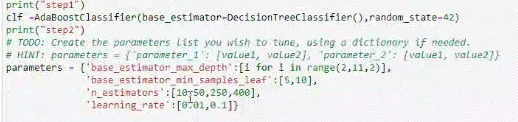

# Example Random forest titanic

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score #new
clf = RandomForestClassifier(random_state=42)
# TODO: Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[1,3,5,7,9],
              'min_samples_split':[2,4,6,8],
              'n_estimators': range(2,10,2),
              'max_features': range(500,900,100)}
cv_sets=ShuffleSplit(n_splits=3, test_size=0.2, train_size=None)
# TODO: Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,cv=cv_sets, n_jobs = -1,verbose = 1)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

# Let's also explore what parameters ended up being used in the new model.
best_clf